In [9]:
# all of these libraries are used for plotting
import numpy as np
import matplotlib.pyplot as plt

# Needed to transform our numpy grid into a torch object 
import torch
from torch.autograd import Variable


# Define the grid on which we will evaluate our classifier
# it ranges from -2 to 3 in x, -5 to 3 in y
x_min, x_max = -1, 2.8
y_min, y_max = -4, 2.8
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

# Our grid is currently a numpy array. We transform it into a torch Variable
# This will allow us to call Forward on it.
to_forward = Variable(
    torch.from_numpy(
        np.array(zip(xx.ravel(), yy.ravel()))
    ).float(),
    requires_grad=False
)

# Plot the dataset
def plot_data(ax, X, Y):
    plt.axis('off')
    ax.scatter(X[:, 0], X[:, 1], s=1, c=Y, cmap='bone')
    plt.axis([x_min, x_max, y_min, y_max])

# plot the decision boundary of our classifier
def plot_decision_boundary(ax, X, Y, classifier):
    # forward pass on the grid, then convert to numpy for plotting
    Z = classifier.forward(to_forward).data.numpy()
    Z = Z.reshape(xx.shape)
    
    # plot contour lines of the values of our classifier on the grid
    ax.contourf(xx, yy, Z>0.5, cmap='Blues')
    
    # then plot the dataset
    plot_data(ax, X,Y)
    
    

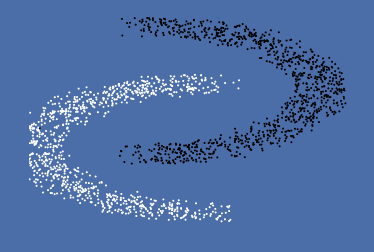

In [10]:
%matplotlib inline
# load the data and visualize it
data = np.load('./double_moon.npz')
X = data['X']
Y = data['Y']
fig, ax = plt.subplots(1, 1, facecolor='#4B6EA9')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plot_data(ax, X, Y)
plt.show()

In [11]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

# y = Ax + b
class MyLinear(nn.Module):
    def __init__(self, n_input, n_output):
        super(MyLinear, self).__init__()
        self.A = nn.Parameter(torch.randn(n_input, n_output))
        self.b = nn.Parameter(torch.randn(n_output))

    def forward(self, x):
        return torch.mm(x, self.A) + self.b

<IPython.core.display.Javascript object>


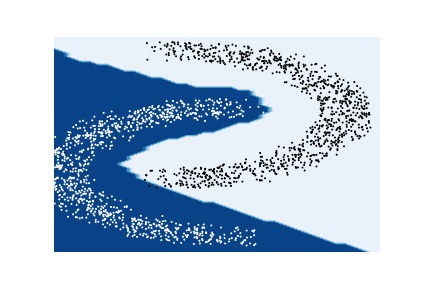

<IPython.core.display.Javascript object>


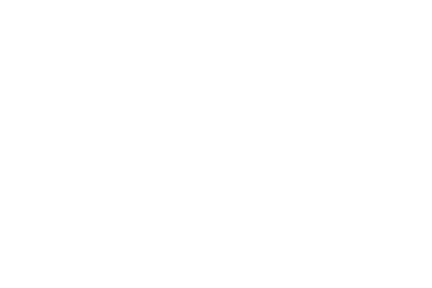

In [8]:
%matplotlib notebook
from torch import optim


h=50

# define your network with nn.sequential
# it could be a linear layer with 2 inputs and h outputs, followed by a ReLU
# then a linear layer with h inputs and 1 outputs, followed by a sigmoid
# feel free to try other architectures
net = nn.Sequential(
    MyLinear(2, h),
    nn.ReLU(),
    MyLinear(h, 1),
    nn.Sigmoid()
)

optimizer = optim.SGD(net.parameters(), lr=1e-2)

X_torch = Variable(torch.from_numpy(X).float())
Y_torch = Variable(torch.from_numpy(Y).float())

fig, ax = plt.subplots(1, 1, facecolor='#4B6EA9')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)


criterion = nn.BCELoss()
for it in xrange(10000):
    # pick a random example id 
    j = np.random.randint(1, len(X))

    # select the corresponding example and label
    example = X_torch[j:j+1]
    label = Y_torch[j]

    # do a forward pass on the example
    output = net(example)

    # compute the loss according to your output and the label
    loss = criterion(output, label)    

    # zero the gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # gradient step
    optimizer.step()

    # draw the current decision boundary every 250 examples seen
    if it % 250 == 0 : 
        plot_decision_boundary(ax, X,Y, net)
        fig.canvas.draw()
plot_decision_boundary(ax, X,Y, net)
fig.canvas.draw()